# Wine Quality Prediction

## Introduction

Wine quality prediction involves using machine learning models to predict the quality of wine based on various chemical properties. This can help wine producers and consumers understand what characteristics contribute to a high-quality wine.

## Data Description

The WineQT.csv file contains data on various chemical properties of wines and their quality ratings. The dataset typically includes:


**Fixed Acidity:** The fixed acidity level in the wine.

**Volatile Acidity:** The volatile acidity level in the wine.

**Citric Acid:** The amount of citric acid in the wine.

**Residual Sugar:** The residual sugar content in the wine.

**Chlorides:** The chloride content in the wine.

**Free Sulfur Dioxide:** The amount of free sulfur dioxide in the wine.

**Total Sulfur Dioxide:** The total amount of sulfur dioxide in the wine.

**Density:** The density of the wine.

**pH:** The pH level of the wine.

**Sulphates:** The amount of sulphates in the wine.

**Alcohol:** The alcohol content of the wine.

**Quality:** The quality rating of the wine (usually on a scale from 0 to 10).



## Purpose of Wine Quality Prediction

The main purposes of predicting wine quality include:

Quality Control: Ensure consistent quality in wine production.

Product Development: Develop new wine products with desired quality characteristics.

Market Differentiation: Identify unique selling points based on chemical properties.

Consumer Guidance: Help consumers make informed decisions about wine purchases.

Efficiency: Improve production processes by understanding the impact of different chemical properties on wine quality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimpy import skim
from termcolor import colored

In [2]:
wine_QT=pd.read_csv('wineQT.csv')

In [3]:
wine_QT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine_QT.shape

(1143, 13)

In [5]:
skim(wine_QT)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1143   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA ┃ NA % ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ fixed acidity        │  0 │    0 │   8.311 │    1.748 │    4.6 │    7.1 │    7.9 │    9.1 │  15.9 │ ▁▇▅▁▁  │  │
│ │ volatile acidity     │  0 │    0 │  0.5313 │   0.1796 │   0.12 │ 0.3925 │   0.52 │   0.64 │  1.58 │  ▃▇▅▁  │  │
│ │ citric acid          │  0 │    0 │  0.2684 │   0.1967 │      0 │   0.09 │   0.25 │   0.42 │     1 │ ▇▇▅▃▁  │  │
│ │ residual sugar       │  0 │    0 │   2.532 │    1.356 │    0.9 │    1.9 │    2.2 │    2.6 │  15.5 │   ▇▁   │  │
│ │ chlorides            │  0 │    0 │ 0.08693 │  0.04727 │  0.012 │   0.07 │  0.079 │   0.09 │ 0.611 │   ▇▁   │  │
│ │ free sulfur dioxide  │  0 │    0 │   15.62 │    10.25 │      1 │      7 │     13 │     21 │    68 │  ▇▅▃▁  │  │
│ │ total sulfur dioxide │  0 │    0 │   45.91 │    32.78 │      6 │     21 │     37 │     61 │   289 │  ▇▃▁   │  │
│ │ density              │  0 │    0 │  0.9967 │ 0.001925 │ 0.9901 │ 0.9956 │ 0.9967 │ 0.9978 │ 1.004 │  ▂▇▆▂  │  │
│ │ pH                   │  0 │    0 │   3.311 │   0.1567 │   2.74 │  3.205 │   3.31 │    3.4 │  4.01 │  ▂▇▅▁  │  │
│ │ sulphates            │  0 │    0 │  0.6577 │   0.1704 │   0.33 │   0.55 │   0.62 │   0.73 │     2 │  ▇▇▁   │  │
│ │ alcohol              │  0 │    0 │   10.44 │    1.082 │    8.4 │    9.5 │   10.2 │   11.1 │  14.9 │ ▃▇▅▂▁  │  │
│ │ quality              │  0 │    0 │   5.657 │   0.8058 │      3 │      5 │      6 │      6 │     8 │  ▁▇▇▂  │  │
│ │ Id                   │  0 │    0 │     805 │      464 │      0 │    411 │    794 │   1210 │  1597 │ ▇▇▇▇▇▇ │  │
│ └──────────────────────┴────┴──────┴─────────┴──────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
set(wine_QT.quality)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.1)
    q3 = df_in[col_name].quantile(0.9)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in wine_QT.columns:
    wine_data=remove_outlier(wine_QT,i)

In [7]:
wine_data['quality'].value_counts().sort_values(ascending=True)

quality
3      6
8     16
4     33
7    143
6    462
5    483
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

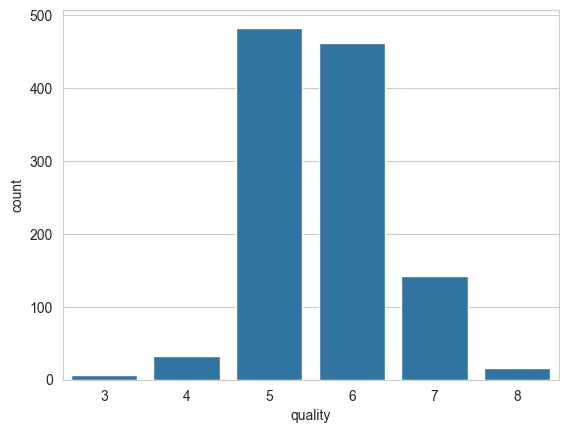

In [8]:
sns.countplot(x=wine_data['quality'])

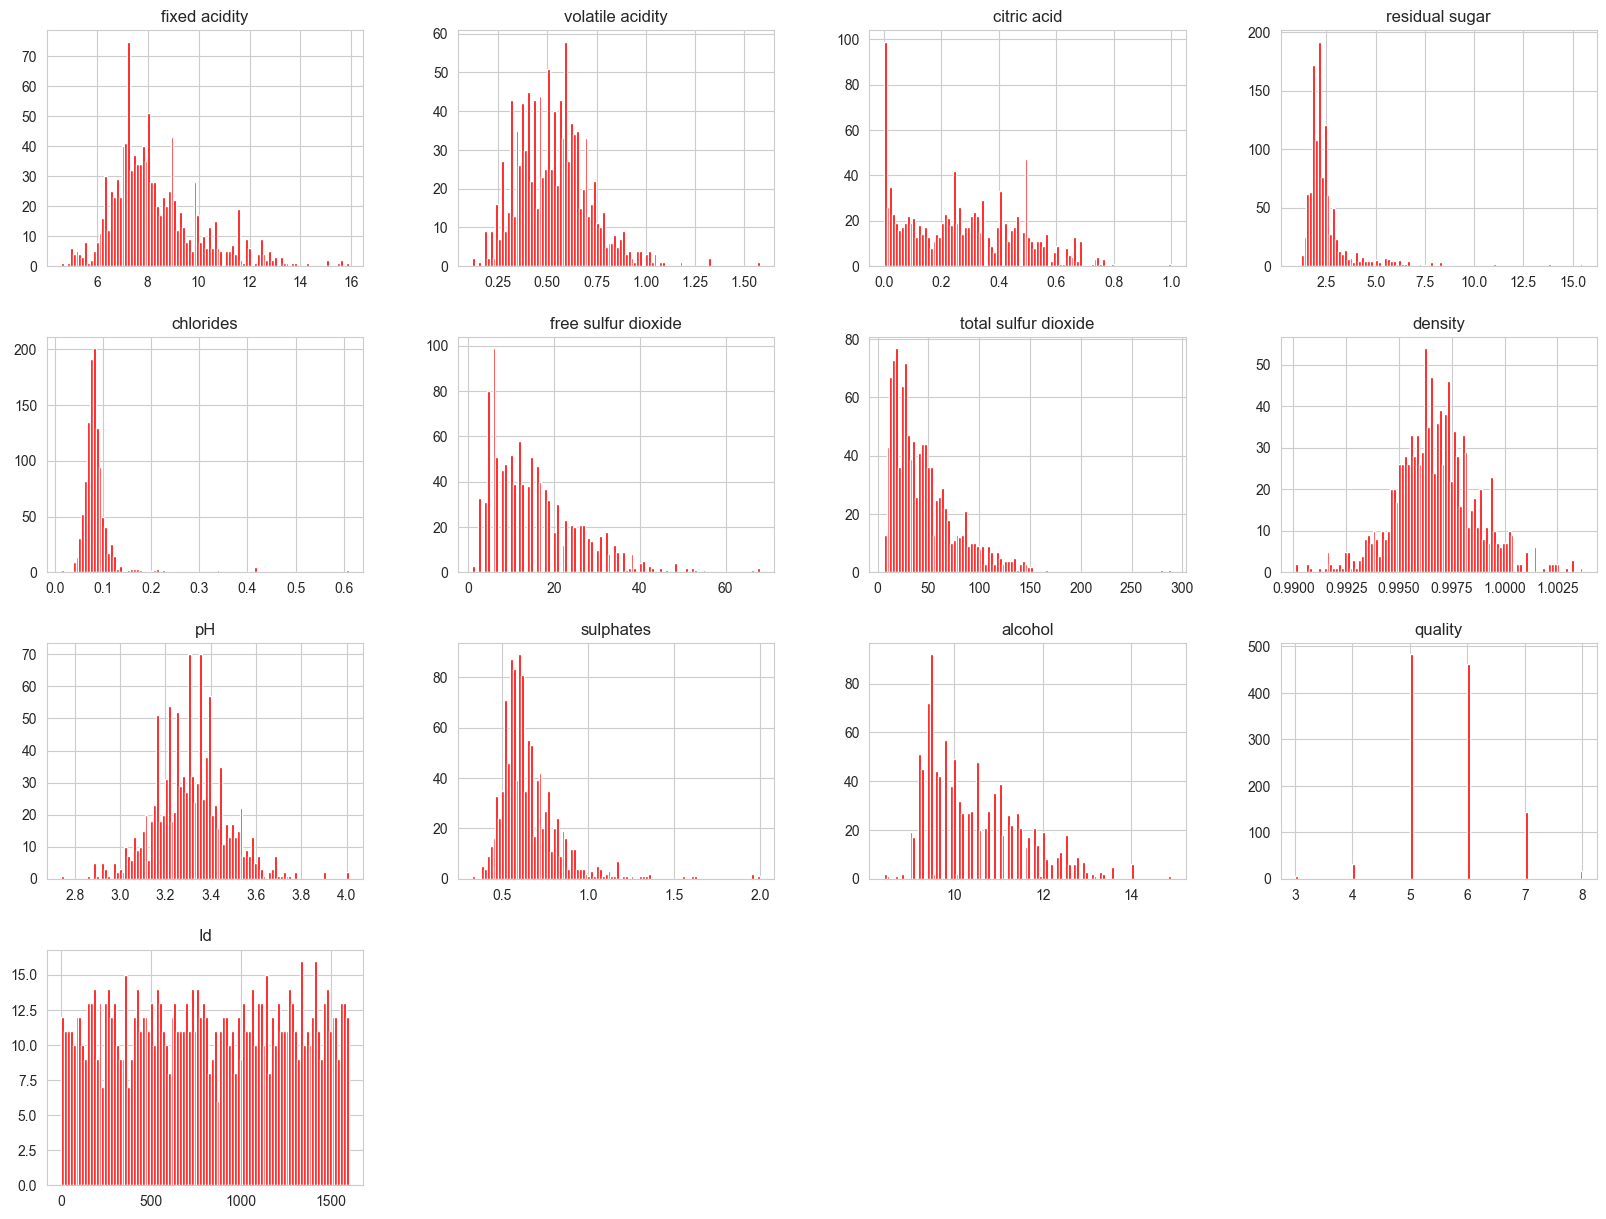

In [9]:
wine_data.hist(bins=100,figsize=(20,15),color='Red')
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

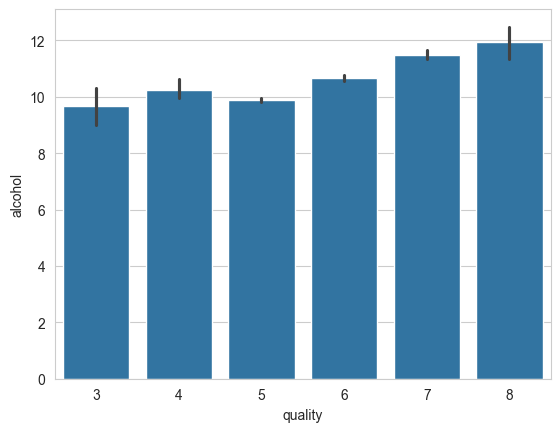

In [10]:
sns.barplot(x='quality', y='alcohol', data=wine_data)

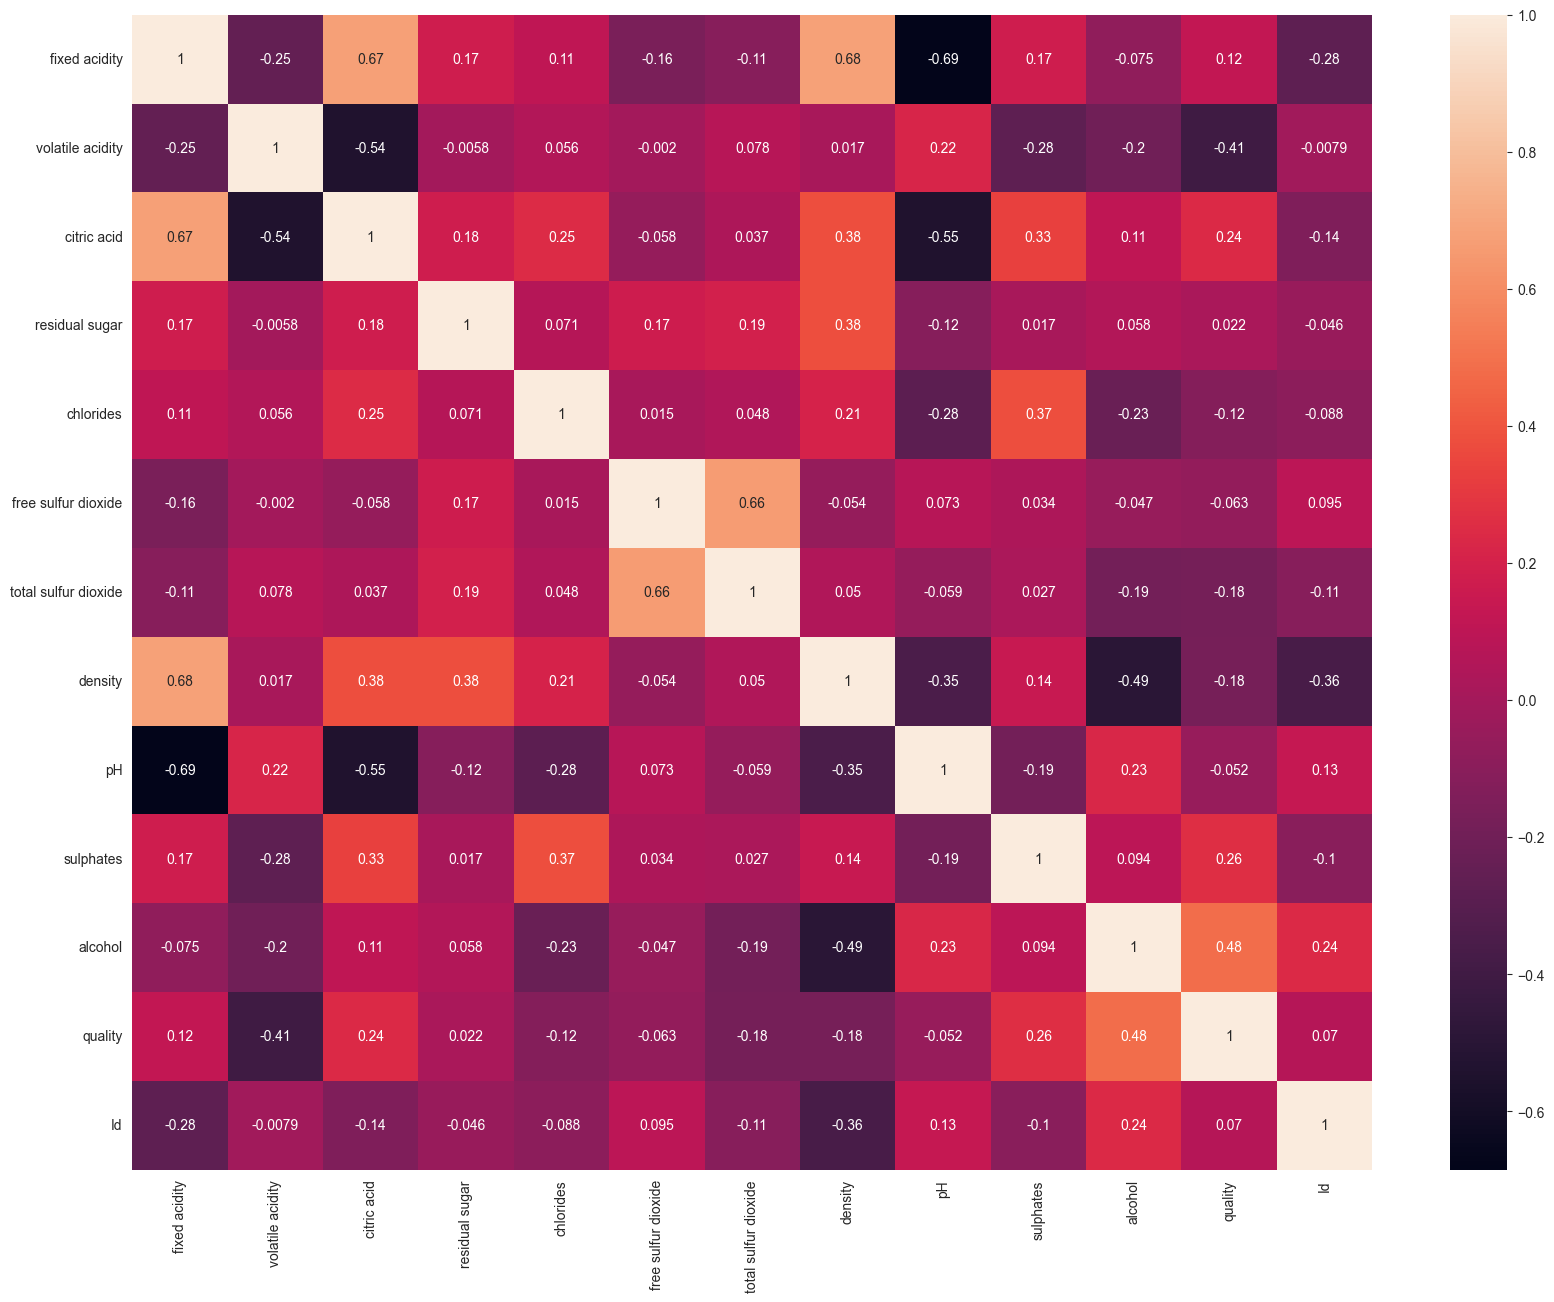

In [11]:
corr = wine_data.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

Median value for fixed acidity:7.9


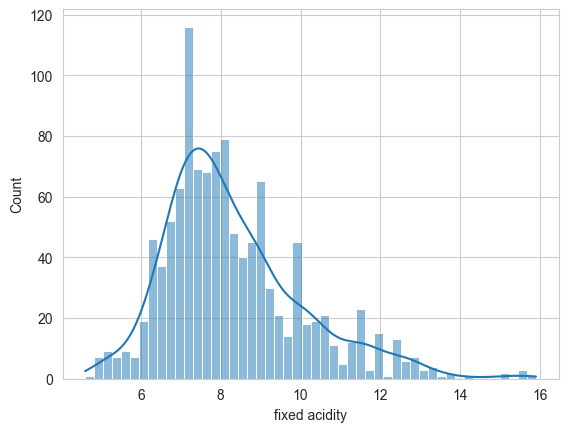

Median value for volatile acidity:0.52


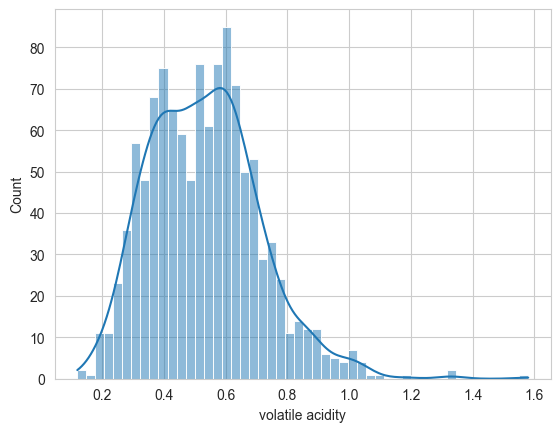

Median value for citric acid:0.25


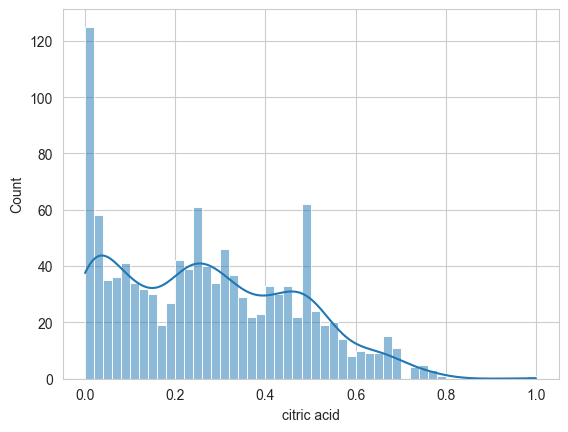

Median value for residual sugar:2.2


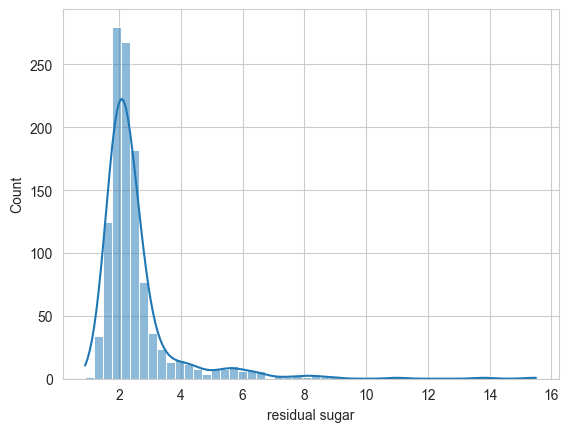

Median value for chlorides:0.079


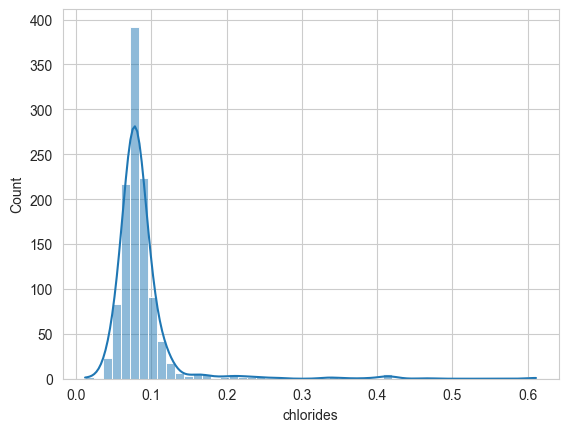

Median value for free sulfur dioxide:13.0


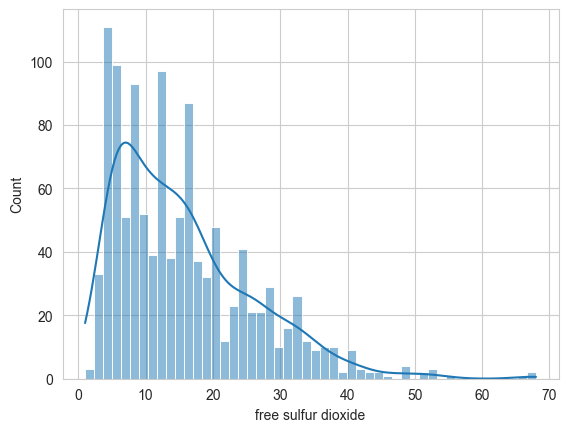

Median value for total sulfur dioxide:37.0


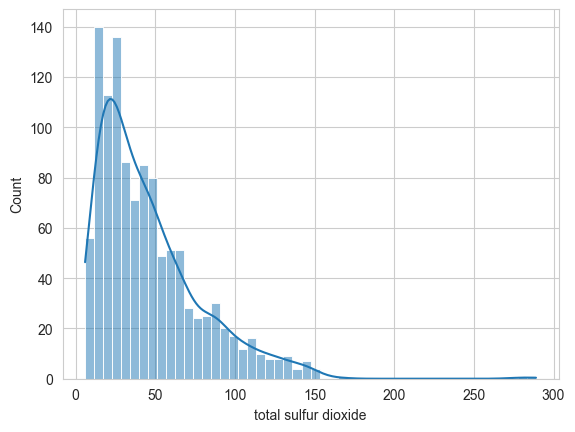

Median value for density:0.99668


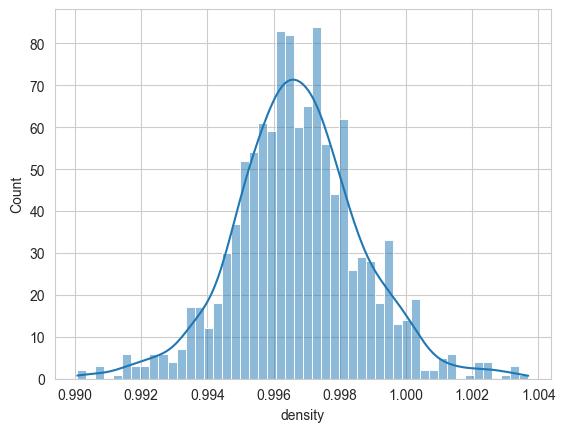

Median value for pH:3.31


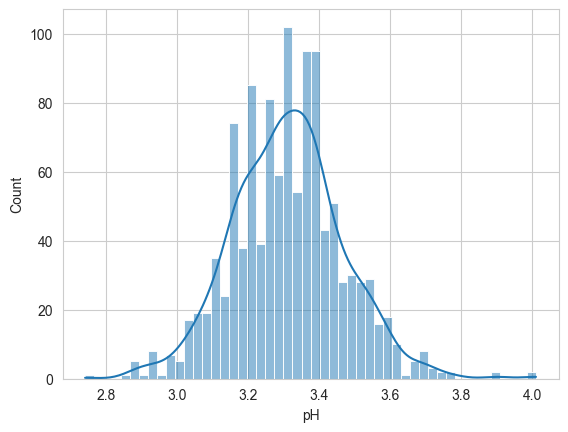

Median value for sulphates:0.62


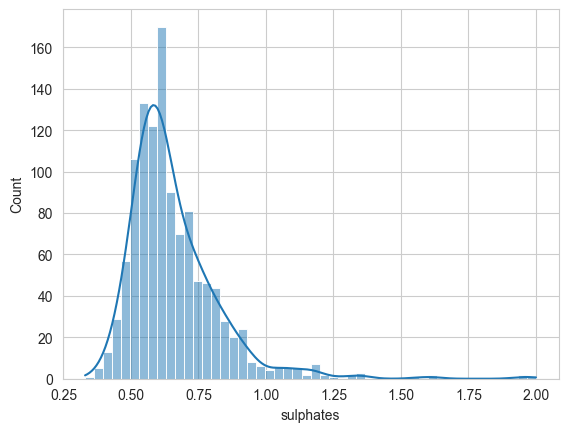

Median value for alcohol:10.2


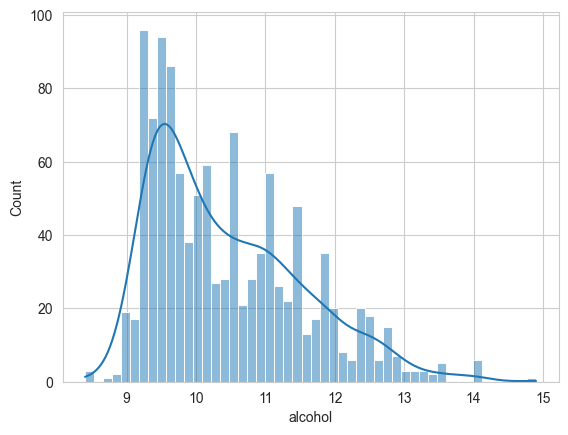

Median value for quality:6.0


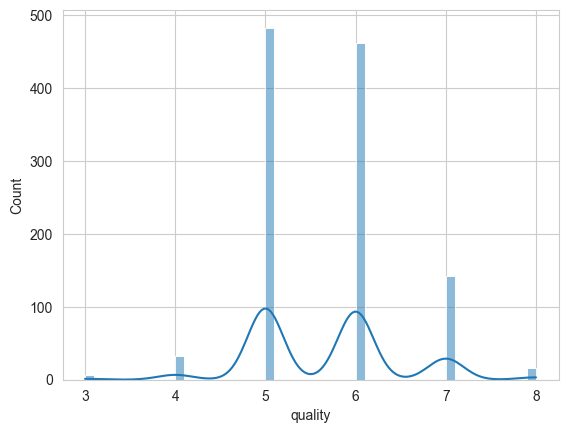

Median value for Id:794.0


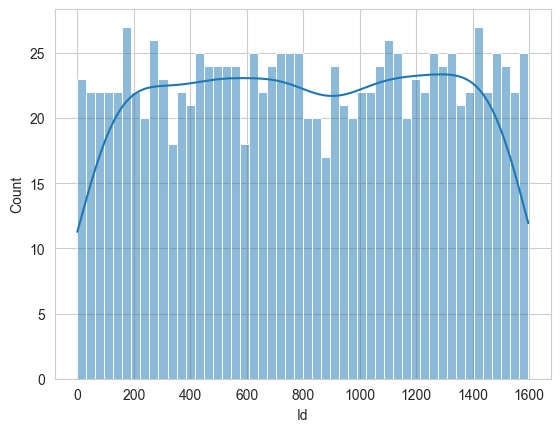

In [12]:
for column in wine_data.columns:
    print(f"Median value for {column}:{np.median(wine_data[column])}")
    sns.histplot(wine_data[column],kde=True,bins=50)
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [14]:
x=wine_data.drop(columns=["quality"])
y=wine_data['quality'].apply(lambda y_values: 1 if y_values>=7 else 0)
y.unique()

array([0, 1], dtype=int64)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [16]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train" ,y_train.shape)
print("Y_test", y_test.shape)

X_train: (914, 12)
X_test: (229, 12)
Y_train (914,)
Y_test (229,)


In [17]:
# Initialize models
models = {
    'SVM': SVC(C=50,kernel='rbf',random_state=42),
    'SDC':SGDClassifier(max_iter=3000),
    'Random Forest': RandomForestClassifier()
}

    
# Train and evaluate models
accuracy_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

#print the models
for i in accuracy_results:
    print(i,f":{accuracy_results[i]}")

SVM :0.8646288209606987
SDC :0.8646288209606987
Random Forest :0.9213973799126638


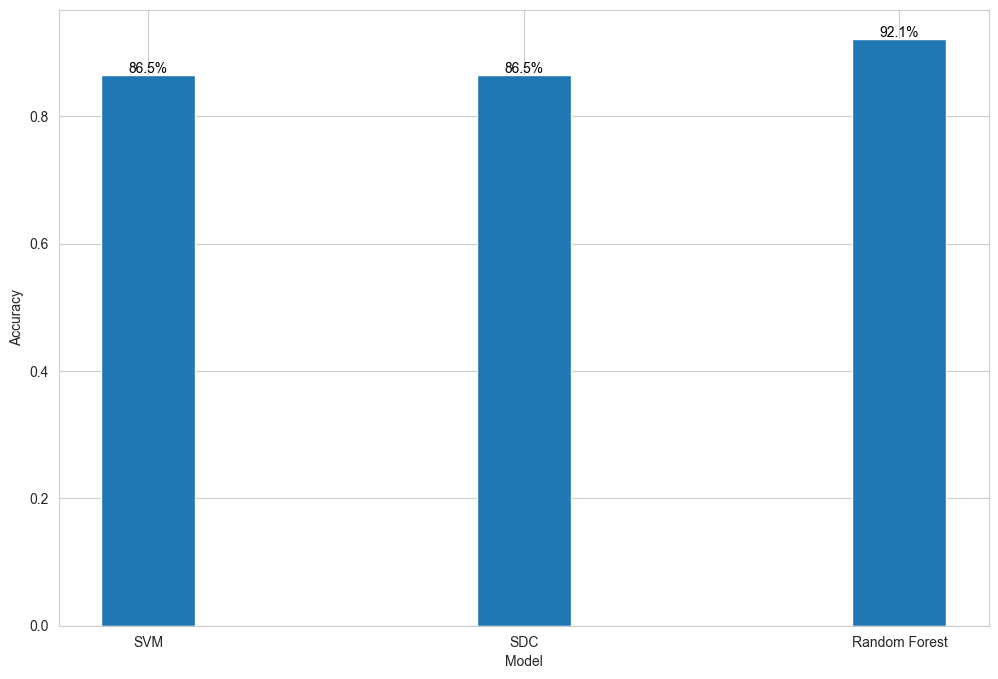

Accuracy Score of Random Forest : 0.9213973799126638


In [18]:
plt.figure(figsize=(12,8))
plt.bar(range(len(accuracy_results)), accuracy_results.values(),width=0.25)
plt.xticks(range(len(accuracy_results)), accuracy_results.keys())
for i, v in enumerate(accuracy_results.values()):
    plt.text(i, v+0.01, f"{v*100:.1f}%", ha='center', va='center', color='black')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
print(colored(f"Accuracy Score of Random Forest : {accuracy_results['Random Forest']}",'red'))

# Conclusion for Wine Data Analysis

Wine quality prediction through data analysis provides significant benefits to winemakers, consumers, and researchers. By leveraging machine learning models to analyze various chemical properties of wine, stakeholders can gain a deeper understanding of what factors contribute to high-quality wine. This analysis aids in ensuring consistent quality control, optimizing production processes, and developing new wine products with desirable characteristics.

In summary, wine data analysis is a valuable tool that drives innovation, efficiency, and quality in the wine industry, ultimately leading to better products and more satisfied consumers.